In [36]:
import pandas as pd
import matplotlib.pyplot as plt 

In [135]:
df = pd.read_csv("conso-quotidienne.csv",sep=';')
df = df[df.region=='Hauts-de-France']
df = df.dropna(subset='consommation_brute_electricite_rte')
df = df[['date','heure','date_heure','consommation_brute_electricite_rte']]
df.to_csv('conso-hdf.csv')

# 1- A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.


<AxesSubplot: xlabel='date'>

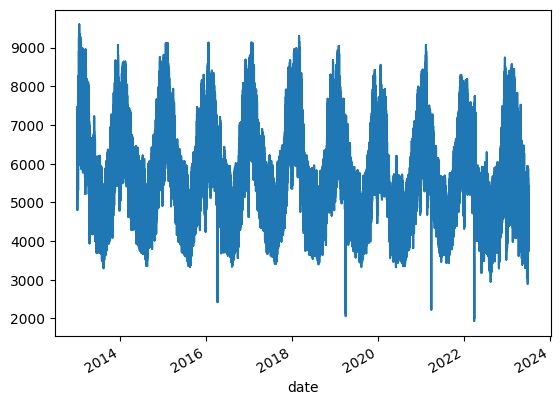

In [136]:
df = pd.read_csv("conso-hdf.csv", index_col='date', parse_dates=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.consommation_brute_electricite_rte.plot()

<AxesSubplot: xlabel='date'>

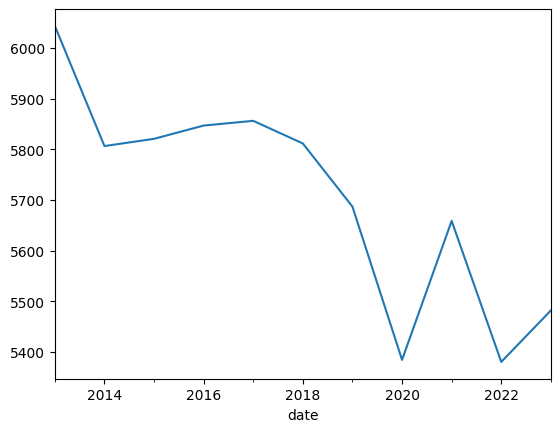

In [86]:
df.consommation_brute_electricite_rte.resample('Y').mean().plot()

<AxesSubplot: xlabel='date'>

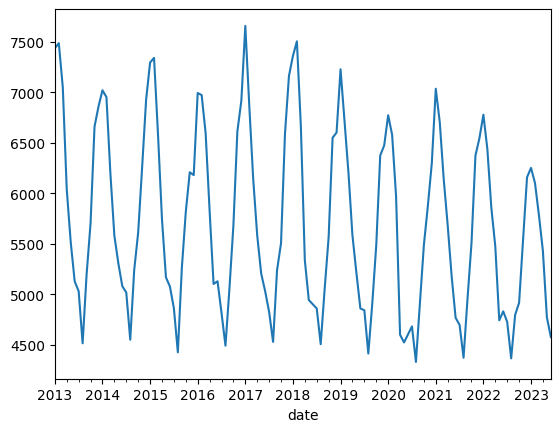

In [87]:
df.consommation_brute_electricite_rte.resample('M').mean().plot()

<AxesSubplot: xlabel='date'>

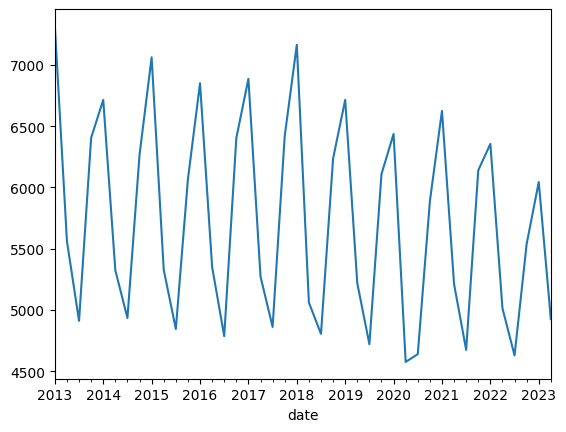

In [88]:
df.consommation_brute_electricite_rte.resample('Q').mean().plot()

<AxesSubplot: xlabel='date'>

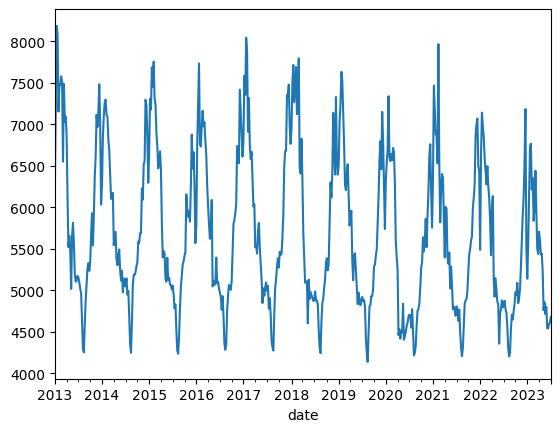

In [90]:
df.consommation_brute_electricite_rte.resample('W').mean().plot()

<AxesSubplot: xlabel='date'>

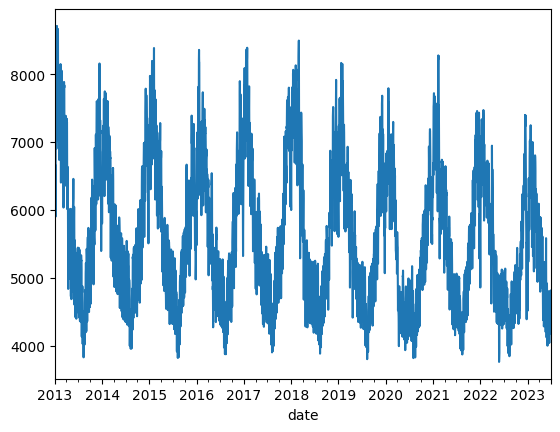

In [95]:
df.consommation_brute_electricite_rte.resample('D').mean().plot()

## 3- A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

<AxesSubplot: xlabel='date'>

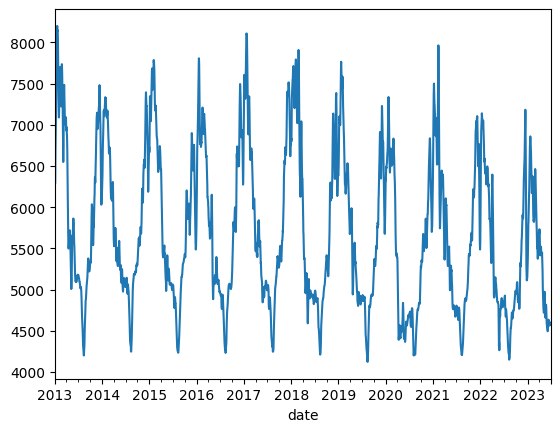

In [96]:
df_day = df.consommation_brute_electricite_rte.resample('D').mean()
df_day.rolling(window=7, center=True,win_type=None).mean().plot()

<AxesSubplot: xlabel='date'>

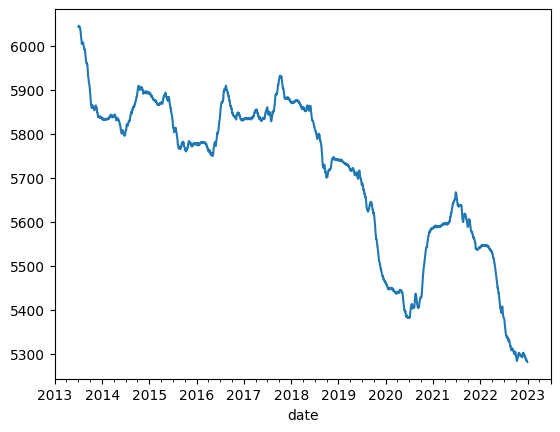

In [97]:
df_day.rolling(window=365, center=True,win_type=None).mean().plot()

Dans une moyenne mobile, chaque point a une moyenne mobile. Chaque jour a une moyenne mobile, calculée avec les points autour de lui.  
Alors que dans l'agrégation, on a un point par semaine. On perd de la donnée.  
Servent à lisser la série temporelle et enlever la saisonnalité.

## 5- A l’aide de box-plots, observez la saisonnalité:
- trimestrielle (chaque trimestre)


<Figure size 1200x600 with 0 Axes>

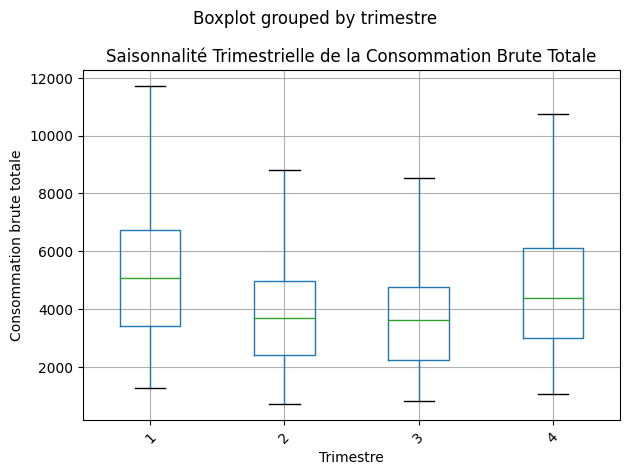

In [119]:
# Extrait le trimestre et l'année de la colonne de date
df = pd.read_csv('conso-quotidienne.csv',sep=';')
df.date = pd.to_datetime(df['date'])
df['trimestre'] = df['date'].dt.quarter
df['annee'] = df['date'].dt.year

# Créez un box plot pour observer la saisonnalité trimestrielle
plt.figure(figsize=(12, 6))  # Taille de la figure (facultatif)
df.boxplot(column='consommation_brute_electricite_rte', by=['trimestre'], showfliers=False)  # Exclure les valeurs aberrantes (facultatif)

# Personnalisez les étiquettes, le titre, etc. (facultatif)
plt.xlabel('Trimestre')
plt.ylabel('Consommation brute totale')
plt.title('Saisonnalité Trimestrielle de la Consommation Brute Totale')

# Affichez le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

- mensuelle

<Figure size 1200x600 with 0 Axes>

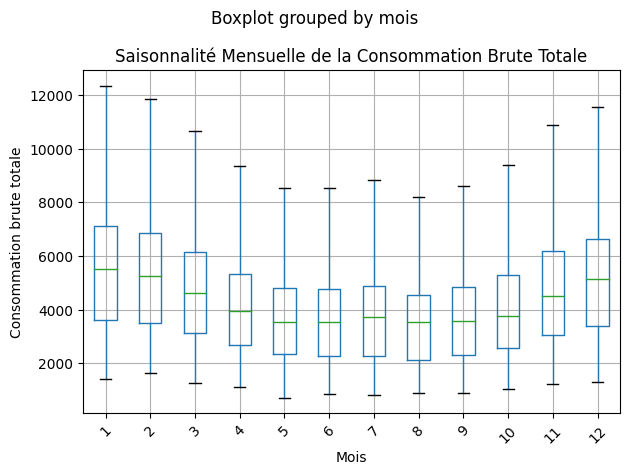

In [121]:
# Créez un box plot pour observer la saisonnalité trimestrielle
plt.figure(figsize=(12, 6))  # Taille de la figure (facultatif)
df['mois'] = df['date'].dt.month
df.boxplot(column='consommation_brute_electricite_rte', by=['mois'], showfliers=False)  # Exclure les valeurs aberrantes (facultatif)

# Personnalisez les étiquettes, le titre, etc. (facultatif)
plt.xlabel('Mois')
plt.ylabel('Consommation brute totale')
plt.title('Saisonnalité Mensuelle de la Consommation Brute Totale')

# Affichez le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

- hebdomadaire

<Figure size 1200x600 with 0 Axes>

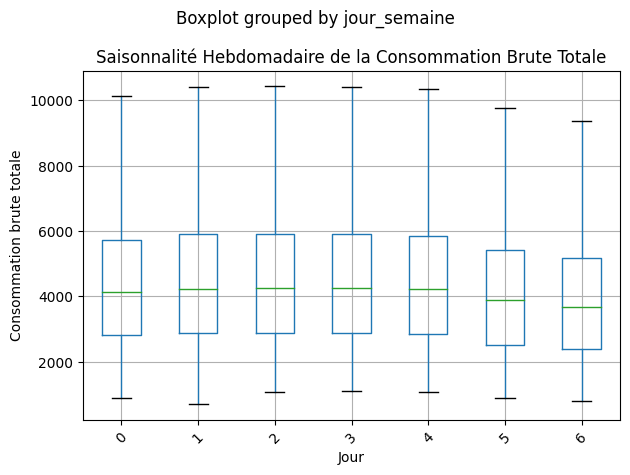

In [122]:
df['jour_semaine'] = df['date'].dt.dayofweek

# Créez un box plot pour observer la saisonnalité trimestrielle
plt.figure(figsize=(12, 6))  # Taille de la figure (facultatif)
df.boxplot(column='consommation_brute_electricite_rte', by=['jour_semaine'], showfliers=False)  # Exclure les valeurs aberrantes (facultatif)

# Personnalisez les étiquettes, le titre, etc. (facultatif)
plt.xlabel('Jour')
plt.ylabel('Consommation brute totale')
plt.title('Saisonnalité Hebdomadaire de la Consommation Brute Totale')

# Affichez le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

<Figure size 3000x600 with 0 Axes>

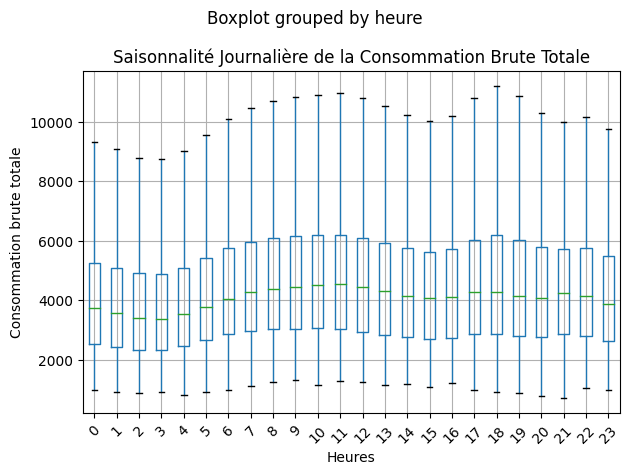

In [123]:
df['date_heure'] = pd.to_datetime(df['date_heure'],format='%Y-%m-%d %H:%M:%S',utc=True)
df['heure'] = df['date_heure'].dt.hour

# Créez un box plot pour observer la saisonnalité trimestrielle
plt.figure(figsize=(30, 6))  # Taille de la figure (facultatif)
df.boxplot(column='consommation_brute_electricite_rte', by=['heure'], showfliers=False)  # Exclure les valeurs aberrantes (facultatif)

# Personnalisez les étiquettes, le titre, etc. (facultatif)
plt.xlabel('Heures')
plt.ylabel('Consommation brute totale')
plt.title('Saisonnalité Journalière de la Consommation Brute Totale')

# Affichez le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

## 6- Qu’est ce que la stationnarité?

La stationnarité d'une série temporelle signifie que les données restent stables dans le temps, il n'y a pas de tendance de saisonnalité ou de variations importantes au fil du temps.  
Visuellement, la time série semble non stationnaire car trend au niveau national et saisonnalité.
Stationnaire = pas de trend + pas de saisonnalité

## 8 - Test de Dickey Fuller

Hypothèse nulle : la distribution est non stationnaire  
Hypothèse alternative : la distribution est stationnaire 

La statistique calculée est la statitstique ADF et suit une distribution de Dicker-Fulley, distribution de type t, semblable à une loi normale mais avec des queues plus épaisses donc moins sensible aux valeurs aberrantes.



In [138]:
df_month = df.consommation_brute_electricite_rte.resample('M').mean()
result = adfuller(df_month,autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.624377
p-value: 0.865378
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581
Failed to Reject Ho - Time Series is Non-Stationary


In [130]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller,kpss

result = adfuller(df_day,autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.231797
p-value: 0.000582
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


Il y avait 0.00057 % de chance d'avoir cette valeur d'ADF dans le cas où H0 est vraie, donc on rejete H0. 

C'est contre-intuitif, il vaut mieux se fier à l'approche graphique qui dit que la série n'est pas² stationnaire.

## 9 - Test de SPSS

Hypothèse nulle : la distribution est stationnaire  
Hypothèse alternative : la distribution est non- stationnaire 

La statistique calculée est la statitstique KPSS.



In [129]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

result = kpss(df_day)
print(f"Statistique de test KPSS : {result[0]}")
print(f"Valeur critique du test: {result[1]}")
print(f'lags : {result[2]}')
print(f'valeurs critiques : {result[3]}')
if result[0] > result[3]['5%']:
    print("Reject H0 - La série temporelle n'est pas stationnaire.")
else:
    print("Failed to Reject H0 - La série temporelle est stationnaire.")

Statistique de test KPSS : 0.49321539945210935
Valeur critique du test: 0.04319472985312853
lags : 38
valeurs critiques : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject H0 - La série temporelle n'est pas stationnaire.


## 10 - Désaisonnalisez la composante annuelle de votre time série est utilisez à nouveau le test de Dickey Fuller. Que comprenez vous de ce résultat?

In [124]:
# Créez une moyenne mobile sur une période d'une semaine (7 jours)
moyenne_mobile_semaine = df_day.rolling(window=365, center=True).mean()
moyenne_mobile_semaine = moyenne_mobile_semaine.dropna()

<AxesSubplot: xlabel='date'>

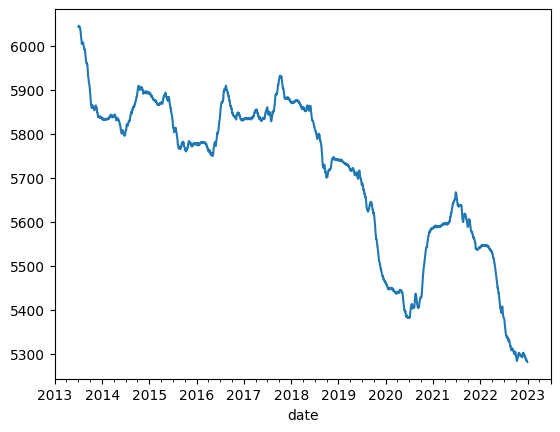

In [126]:
df_day.rolling(window=365, center=True).mean().plot()

In [125]:
result = adfuller(moyenne_mobile_semaine)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.507115
p-value: 0.890620
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


In [127]:
result = kpss(moyenne_mobile_semaine)
print(f"Statistique de test KPSS : {result[0]}")
print(f"Valeur critique du test: {result[1]}")
print(f'lags : {result[2]}')
print(f'valeurs critiques : {result[3]}')

if result[0] > result[3]['5%']:
    print("Reject H0 - La série temporelle n'est pas stationnaire.")
else:
    print("Failed to Reject H0 - La série temporelle est stationnaire.")

Statistique de test KPSS : 6.910623029027695
Valeur critique du test: 0.01
lags : 37
valeurs critiques : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject H0 - La série temporelle n'est pas stationnaire.


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## 12 - Pour vous la série temporelle est plutôt additive ou multiplicative? 

Multiplicative : y = base * trend * saison * bruit  
Additive : y = base + trend + saison + résidu  

Multiplicative : corrélation (positive ou négative) entre trend et saison 
Additive : pas de corrélation entre trend et saison, ce n'est pas parce que le trend augmente que la saisonnalité augmente ou diminue.  

Graphiquement, si on trace une ligne autour des données, si les lignes sont parallèles : additive.  
Si on a un entonoir, c'est plutôt multiplicative.

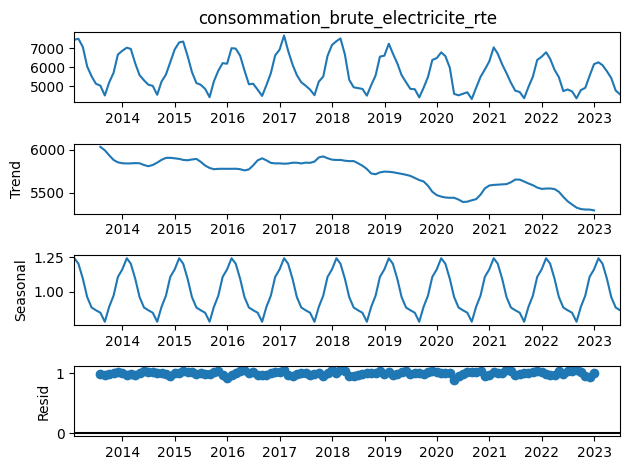

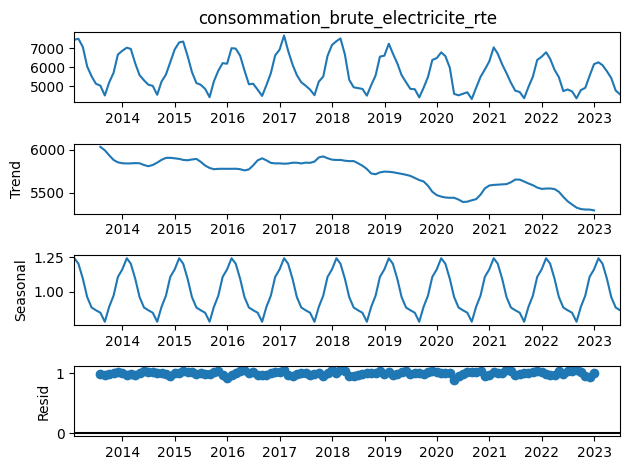

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result_mult = seasonal_decompose(df_month,model='multiplicative')
decompose_result_mult.plot()

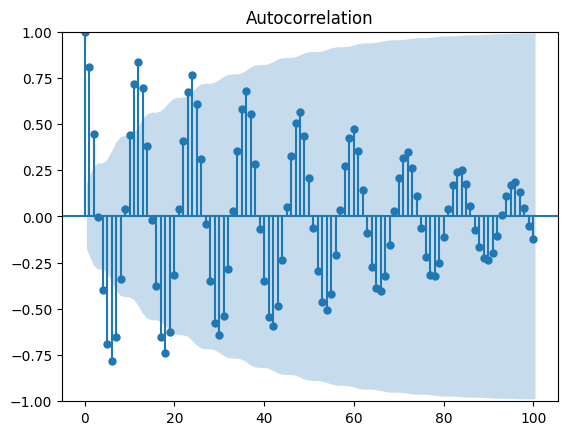

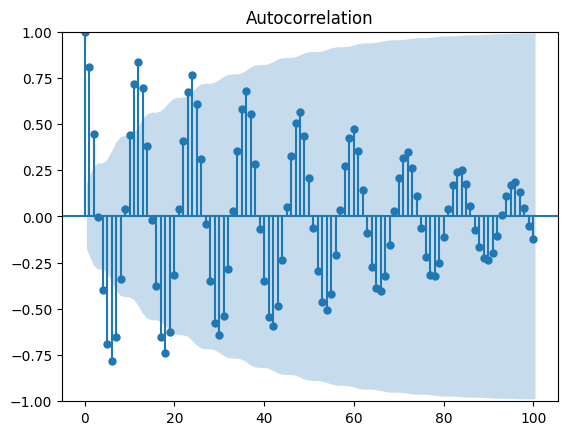

In [146]:
import statsmodels.api as sm
import seaborn as sns 
sm.graphics.tsa.plot_acf(df_month, lags=100) 

In [308]:
# remove trend component
diff = df_month - df_month.shift(1)
diff = diff.dropna(inplace=False)

/tmp/ipykernel_6445/1984722464.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


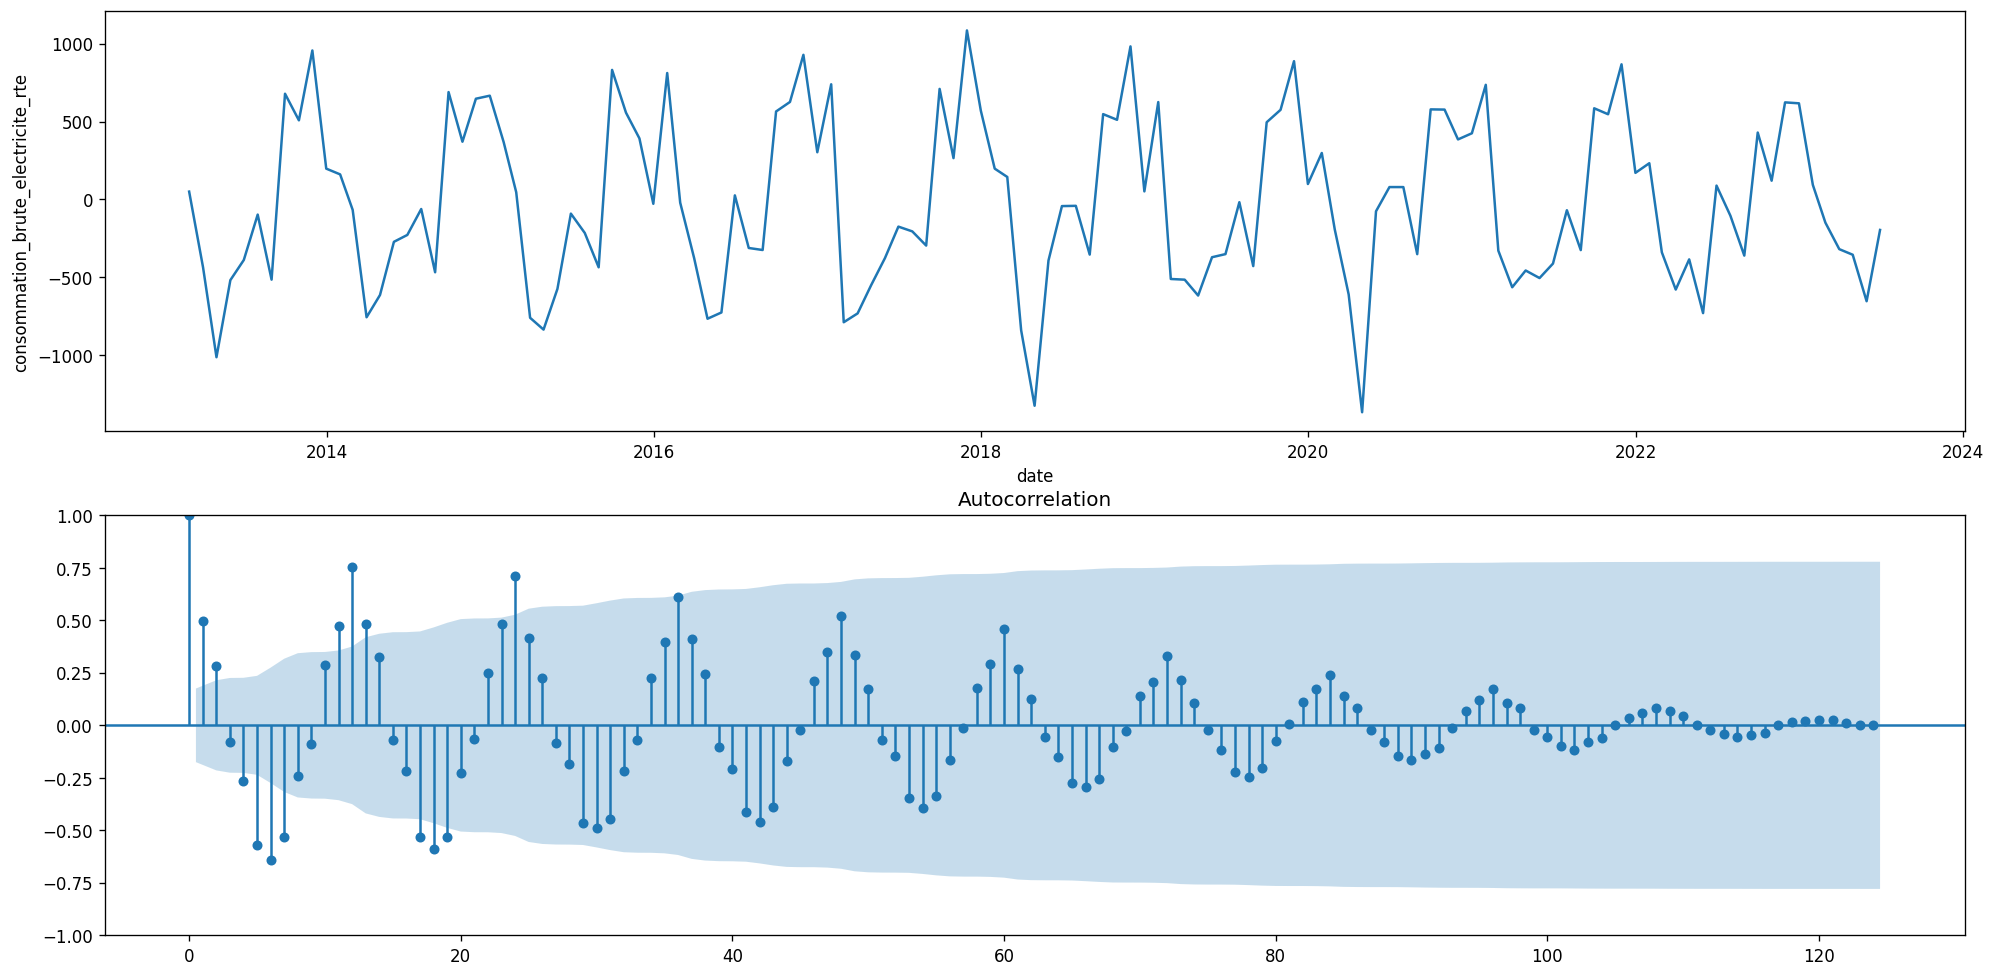

In [313]:
fig = plt.figure(figsize=(20, 10))
subplot1 = fig.add_subplot(211)
subplot2 = fig.add_subplot(212)
sns.lineplot(x=df_month.index[1:],  y=diff, ax=subplot1)
sm.graphics.tsa.plot_acf(diff, lags=124, ax=subplot2) 
fig.show()

In [164]:
diff = df_month- df_month.shift(12)
diff = diff.dropna(inplace=False)

/tmp/ipykernel_6445/3835488831.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


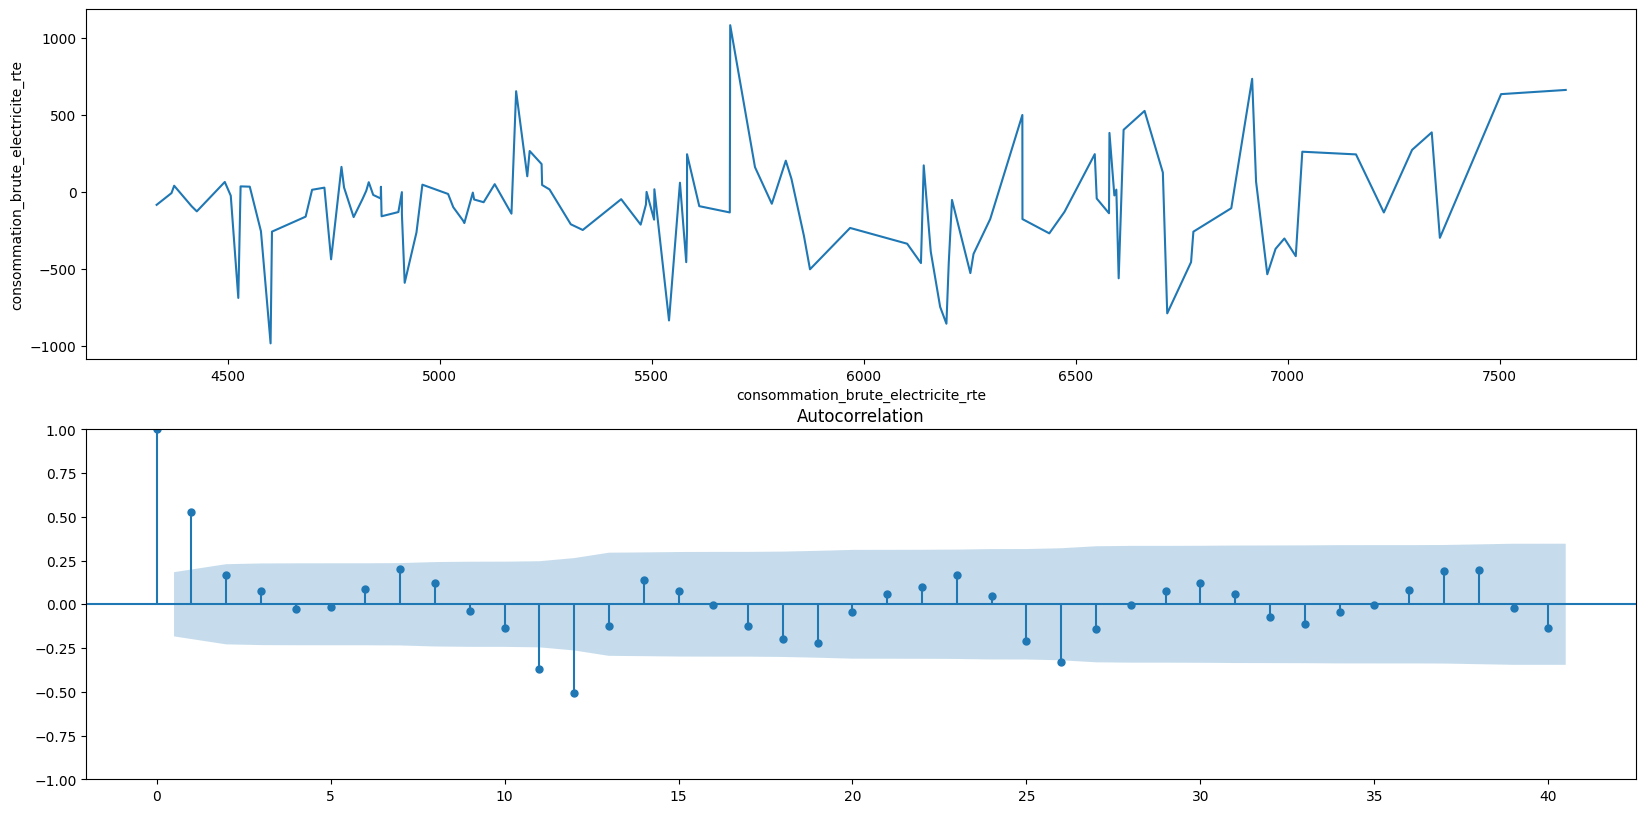

In [165]:
fig = plt.figure(figsize=(20, 10))
subplot1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(diff, lags=40, ax=subplot2) 
fig.show()

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


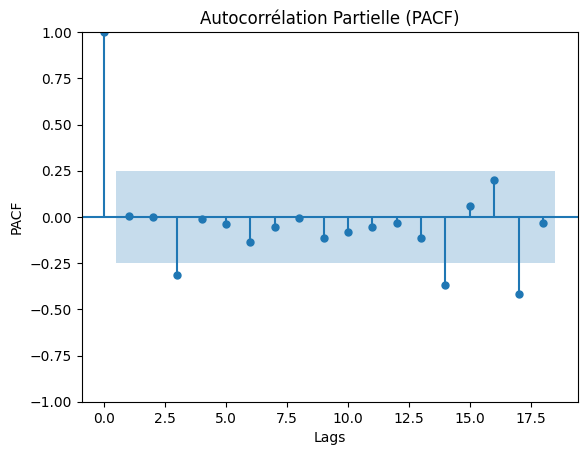

In [179]:
import statsmodels.graphics.tsaplots as tsa_plots


pacf = sm.tsa.pacf(df_month,nlags=60)

# Tracez le graphique de l'autocorrélation partielle
tsa_plots.plot_pacf(pacf)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Autocorrélation Partielle (PACF)')
plt.show()


In [186]:
import statsmodels.api as sm

arma_model = sm.tsa.ARIMA(df_month, order=(2, 0, 3))

arma_model = arma_model.fit()

# Afficher un résumé du modèle
print(arma_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                  126
Model:                                 ARIMA(2, 0, 3)   Log Likelihood                -897.544
Date:                                Wed, 13 Sep 2023   AIC                           1809.089
Time:                                        10:30:34   BIC                           1828.943
Sample:                                    01-31-2013   HQIC                          1817.155
                                         - 06-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5722.9779     43.609    131.234      0.000    5637.506    5808.450
ar.

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [187]:
df_month.shape

(126,)

In [193]:
df_test = df_month.iloc[99:]
df_train = df_month.iloc[:99]

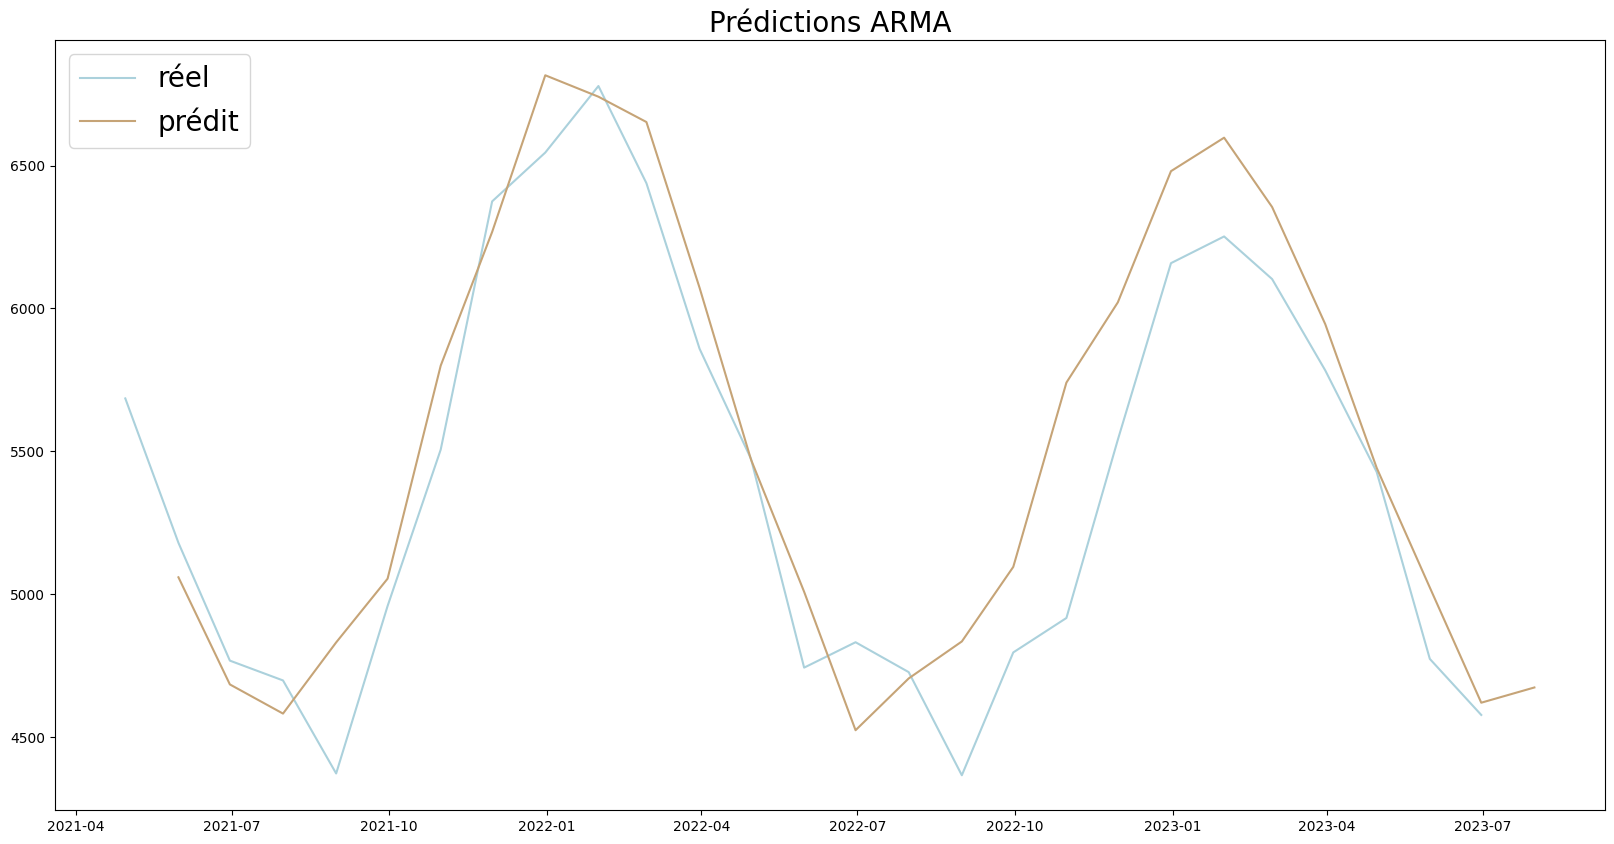

In [194]:
# Générer des prédictions
df_pred = arma_model.predict(start=100, end=126)

# Tracer les valeurs réelles vs prédites
fig = plt.figure(figsize=(20, 10))
plt.title('Prédictions ARMA', fontsize=20)
plt.plot(df_test, label='réel', color='#ABD1DC')
plt.plot(df_pred, label='prédit', color='#C6A477')
plt.legend(fontsize=20, loc='upper left')







In [195]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(df_test[1:], df_pred[1:]))
print("RMSE:", round(rmse,2))

RMSE: 516.39


In [314]:
import statsmodels.api as sm

arima_model = sm.tsa.ARIMA(df_month, order=(2, 1, 3))

arima_model = arima_model.fit()

# Afficher un résumé du modèle
print(arima_model.summary())

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                       SARIMAX Results                                        
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                  126
Model:                                 ARIMA(2, 1, 3)   Log Likelihood                -891.994
Date:                                Thu, 14 Sep 2023   AIC                           1795.987
Time:                                        10:38:36   BIC                           1812.957
Sample:                                    01-31-2013   HQIC                          1802.881
                                         - 06-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7293      0.005    343.196      0.000       1.719       1.739
ar.

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


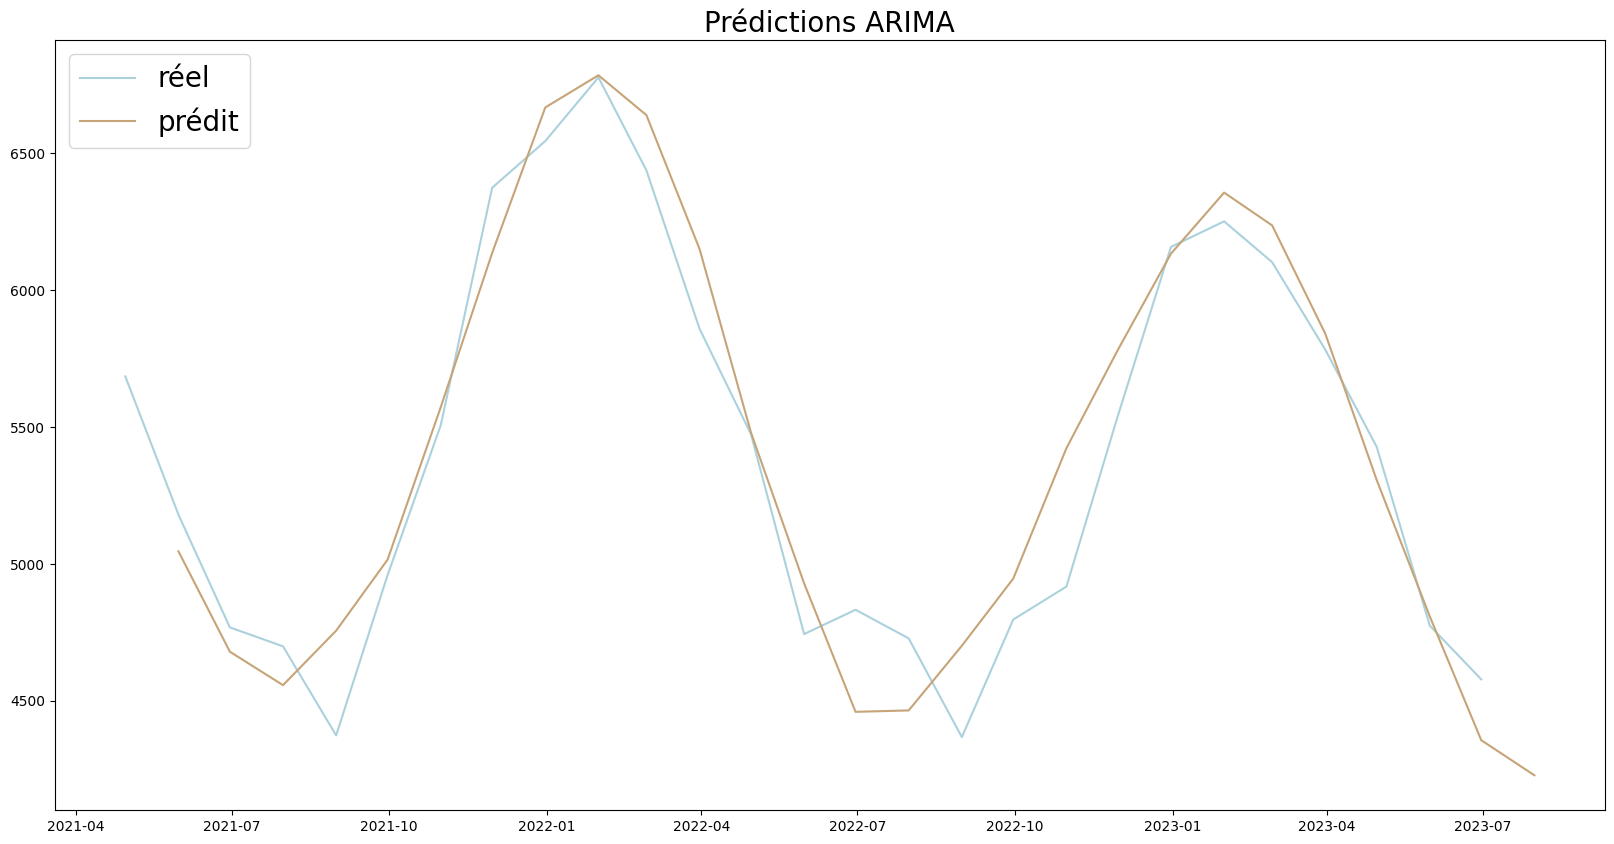

In [205]:
# Générer des prédictions
df_pred = arima_model.predict(start=100, end=126)

# Tracer les valeurs réelles vs prédites
fig = plt.figure(figsize=(20, 10))
plt.title('Prédictions ARIMA', fontsize=20)
plt.plot(df_test, label='réel', color='#ABD1DC')
plt.plot(df_pred, label='prédit', color='#C6A477')
plt.legend(fontsize=20, loc='upper left')

In [206]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(df_test[1:], df_pred[1:]))
print("RMSE:", round(rmse,2))

RMSE: 448.47


In [208]:
SARIMA_model = sm.tsa.statespace.SARIMAX(df_month, order=(2, 1, 3),seasonal_order=(1, 1, 1, 12)).fit()
SARIMA_model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.23170D+00    |proj g|=  1.16629D-01

At iterate    5    f=  6.19231D+00    |proj g|=  1.33885D-02


 This problem is unconstrained.



At iterate   10    f=  6.19144D+00    |proj g|=  2.54145D-03

At iterate   15    f=  6.19084D+00    |proj g|=  5.16862D-03

At iterate   20    f=  6.16037D+00    |proj g|=  6.63392D-02

At iterate   25    f=  6.10364D+00    |proj g|=  1.56611D-02

At iterate   30    f=  6.10232D+00    |proj g|=  2.65654D-03

At iterate   35    f=  6.10188D+00    |proj g|=  3.50276D-03

At iterate   40    f=  6.10183D+00    |proj g|=  7.63172D-04

At iterate   45    f=  6.10180D+00    |proj g|=  8.33182D-04

At iterate   50    f=  6.10180D+00    |proj g|=  1.91674D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                  126
Model:               SARIMAX(2, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -768.827
Date:                                Wed, 13 Sep 2023   AIC                           1553.654
Time:                                        10:56:18   BIC                           1575.473
Sample:                                    01-31-2013   HQIC                          1562.508
                                         - 06-30-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4926      0.454     -1.086      0.277      -1.382       0.396
ar.L2          0.4379      0.299      1.463      0.144      -0.149       1.025
ma.L1          0.0880     23.424      0.004      0.997     -45.822      45.998
ma.L2         -0.9392     25.498     -0.037      0.971     -50.915      49.036
ma.L3         -0.1486      3.354     -0.044      0.965      -6.722       6.424
ar.S.L12      -0.1033      0.112     -0.922      0.357      -0.323       0.116
ma.S.L12      -0.8976      0.311     -2.889      0.004      -1.507      -0.289
sigma2      3.805e+04   8.86e+05      0.043      0.966    -1.7e+06    1.77e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 9.02
Prob(Q):                              0.86   Prob(JB):                         0.01
Heteroskedasticity (H):               1.06   Skew:                            -0.57
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.27e+14. Standard errors may be unstable.
"""

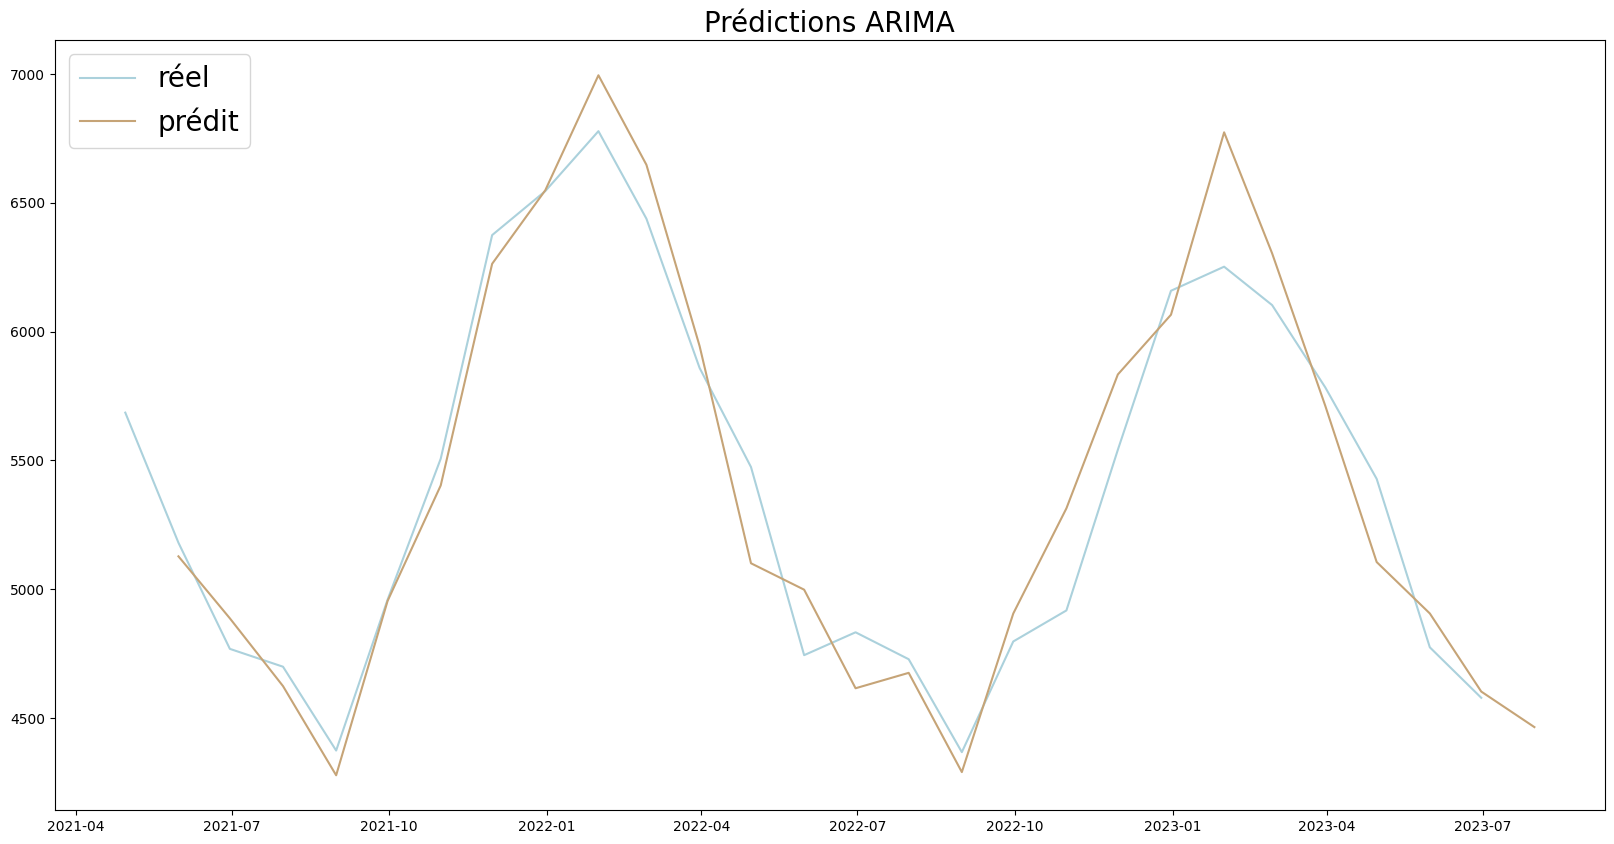

In [209]:
# Générer des prédictions
df_pred = SARIMA_model.predict(start=100, end=126)

# Tracer les valeurs réelles vs prédites
fig = plt.figure(figsize=(20, 10))
plt.title('Prédictions ARIMA', fontsize=20)
plt.plot(df_test, label='réel', color='#ABD1DC')
plt.plot(df_pred, label='prédit', color='#C6A477')
plt.legend(fontsize=20, loc='upper left')

In [210]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(df_test[1:], df_pred[1:]))
print("RMSE:", round(rmse,2))

RMSE: 476.26


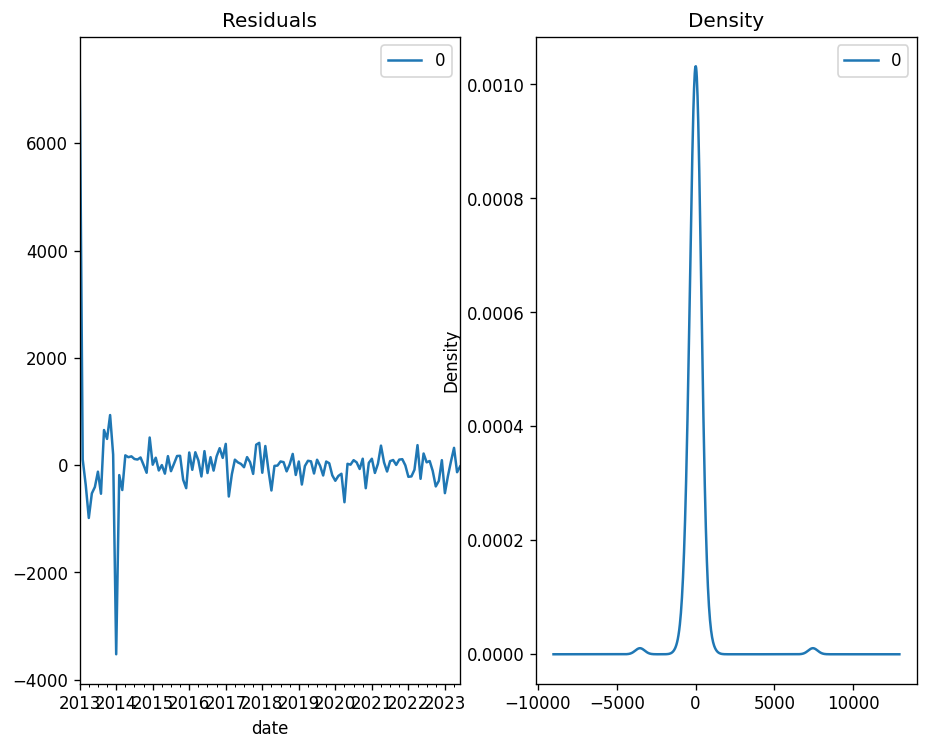

In [251]:
residuals = pd.DataFrame(SARIMA_model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

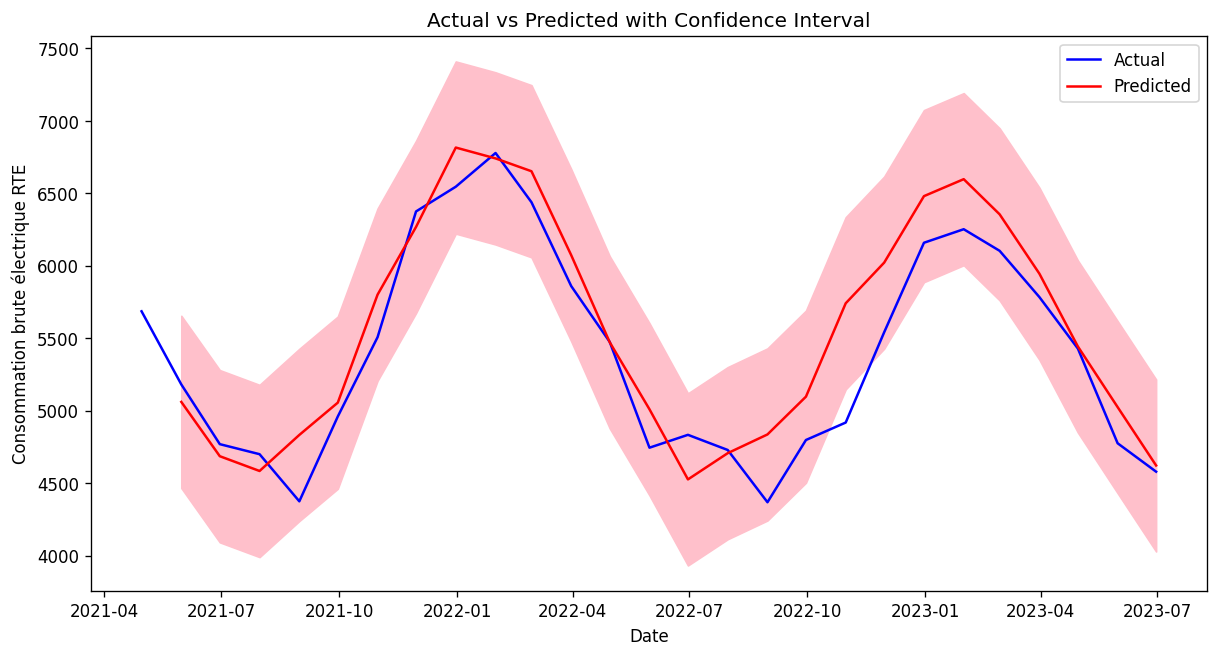

In [254]:
# Obtenez les prédictions
predictions = arma_model.get_prediction(start=100, end=125, dynamic=False)

# Obtenez l'intervalle de confiance
conf_interval = predictions.conf_int()

# Tracer les prédictions et l'intervalle de confiance
plt.figure(figsize=(12, 6))
plt.plot(df_test, label='Actual', color='blue')
plt.plot(predictions.predicted_mean, label='Predicted', color='red')
plt.fill_between(conf_interval.index, conf_interval.iloc[:, 0], conf_interval.iloc[:, 1], color='pink')
plt.title('Actual vs Predicted with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Consommation brute électrique RTE')
plt.legend()
plt.show()


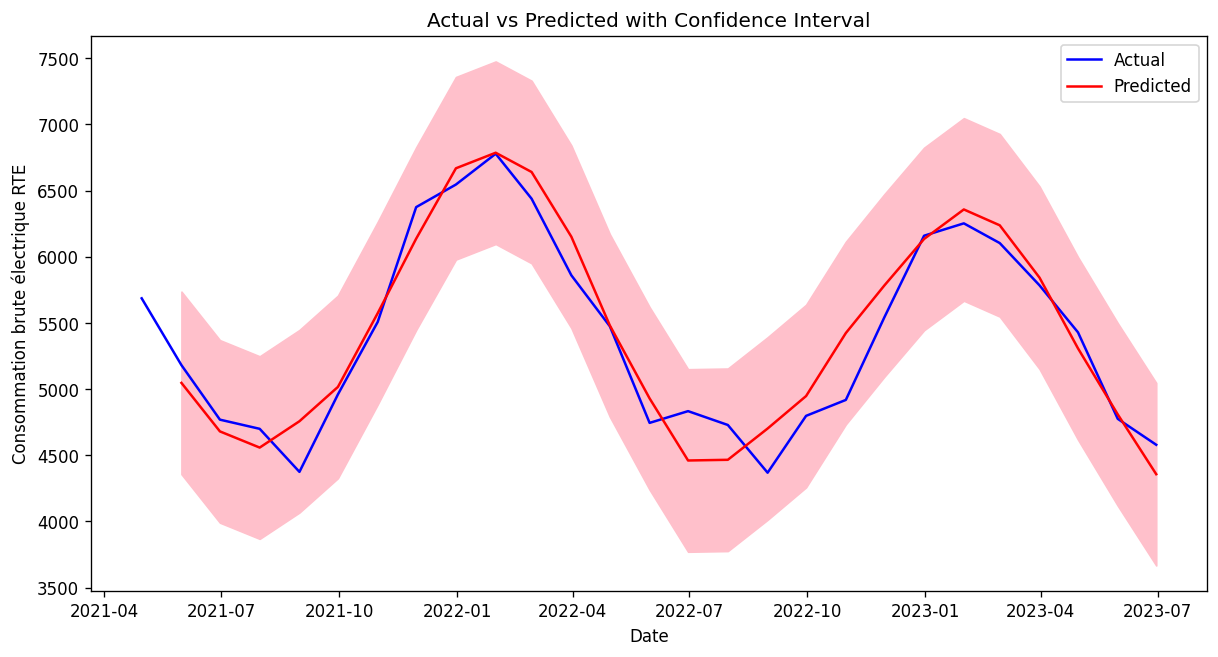

In [256]:
# Obtenez les prédictions
predictions = arima_model.get_prediction(start=100, end=125, dynamic=False)

# Obtenez l'intervalle de confiance
conf_interval = predictions.conf_int()

# Tracer les prédictions et l'intervalle de confiance
plt.figure(figsize=(12, 6))
plt.plot(df_test, label='Actual', color='blue')
plt.plot(predictions.predicted_mean, label='Predicted', color='red')
plt.fill_between(conf_interval.index, conf_interval.iloc[:, 0], conf_interval.iloc[:, 1], color='pink')
plt.title('Actual vs Predicted with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Consommation brute électrique RTE')
plt.legend()
plt.show()


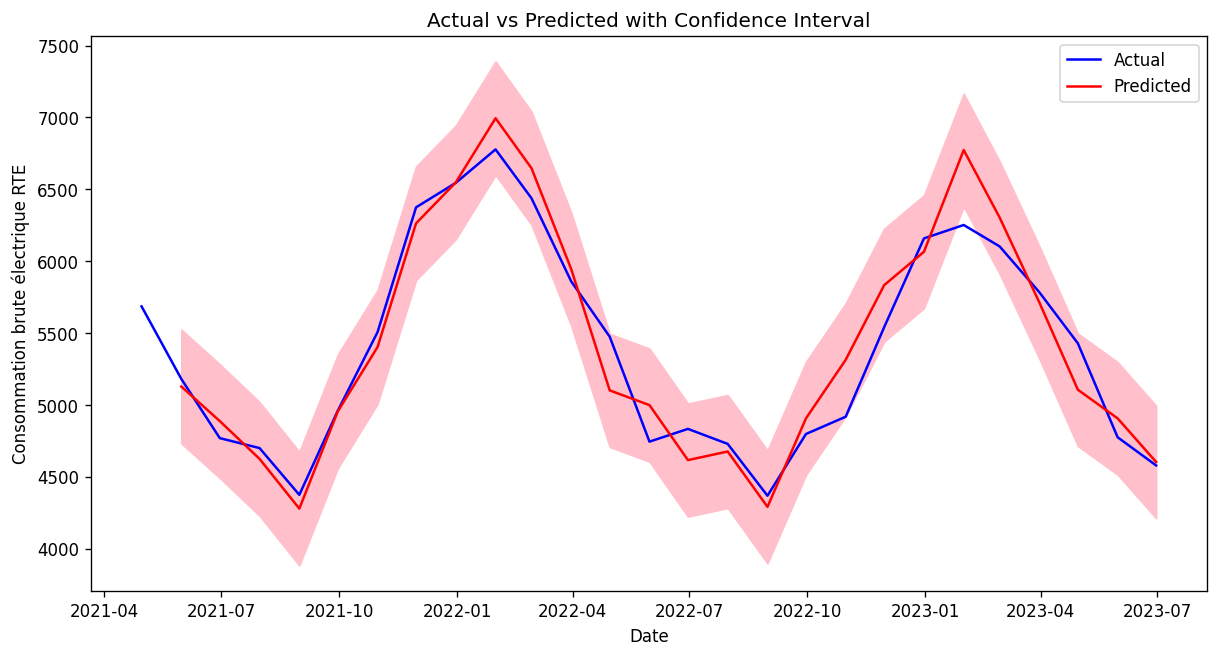

In [257]:
# Obtenez les prédictions
predictions = SARIMA_model.get_prediction(start=100, end=125, dynamic=False)

# Obtenez l'intervalle de confiance
conf_interval = predictions.conf_int()

# Tracer les prédictions et l'intervalle de confiance
plt.figure(figsize=(12, 6))
plt.plot(df_test, label='Actual', color='blue')
plt.plot(predictions.predicted_mean, label='Predicted', color='red')
plt.fill_between(conf_interval.index, conf_interval.iloc[:, 0], conf_interval.iloc[:, 1], color='pink')
plt.title('Actual vs Predicted with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Consommation brute électrique RTE')
plt.legend()
plt.show()


In [280]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_month[:80]
test = df_month[80:]

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


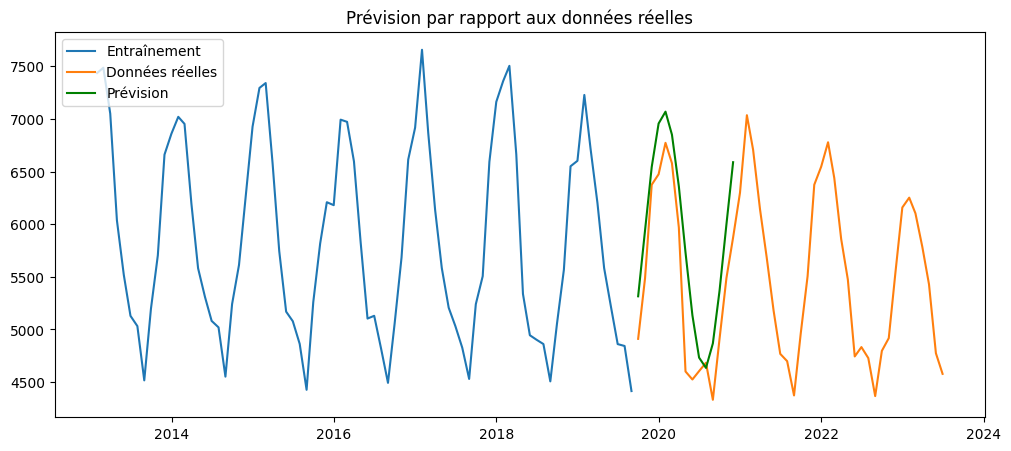

                                       SARIMAX Results                                        
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                   80
Model:                                 ARIMA(2, 1, 3)   Log Likelihood                -560.798
Date:                                Wed, 13 Sep 2023   AIC                           1133.595
Time:                                        12:26:16   BIC                           1147.812
Sample:                                    01-31-2013   HQIC                          1139.291
                                         - 08-31-2019                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7281      0.003    565.464      0.000       1.722       1.734
ar.

In [288]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  

model = sm.tsa.ARIMA(train, order=(2, 1, 3))  
fitted = model.fit()  

# Forecast
forecast = fitted.forecast(steps=15)  # Prévision pour les 15 prochaines périodes

# Créer une série pandas pour la prévision
forecast_series = pd.Series(forecast, index=test.index)

# Tracer les résultats
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='Entraînement')
plt.plot(test, label='Données réelles')
plt.plot(forecast_series, label='Prévision', color='green')
plt.title('Prévision par rapport aux données réelles')
plt.legend(loc='upper left')
plt.show()

print(fitted.summary())


In [283]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm



model = pm.auto_arima(df_month, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1908.194, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2075.023, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1934.640, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1978.374, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2543.040, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1879.600, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1869.454, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1841.591, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1838.458, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1826.426, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1845.362, Time=0.13 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1838.687, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1831.887, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1848.894, Time=0.28 sec

Best model:  ARIMA(3,0,2)(0,0,0)

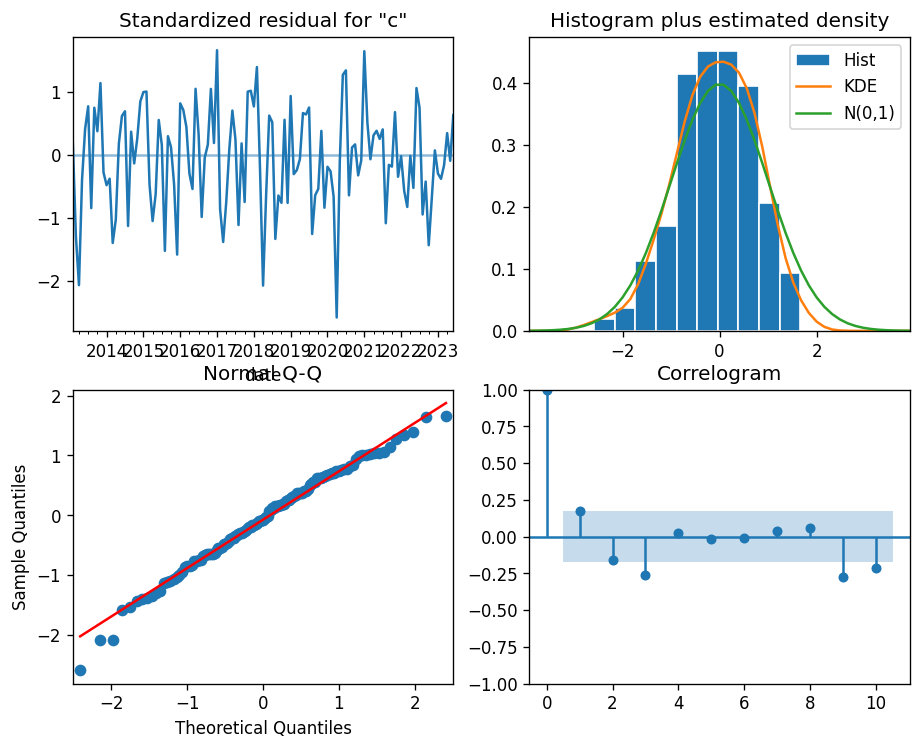

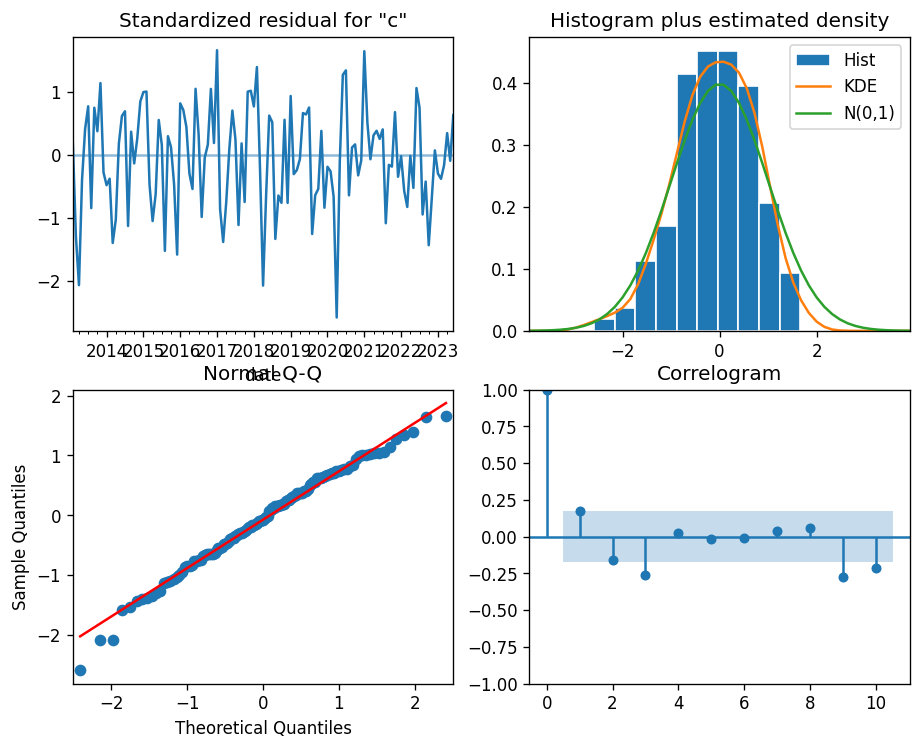

In [289]:
arima_model.plot_diagnostics()

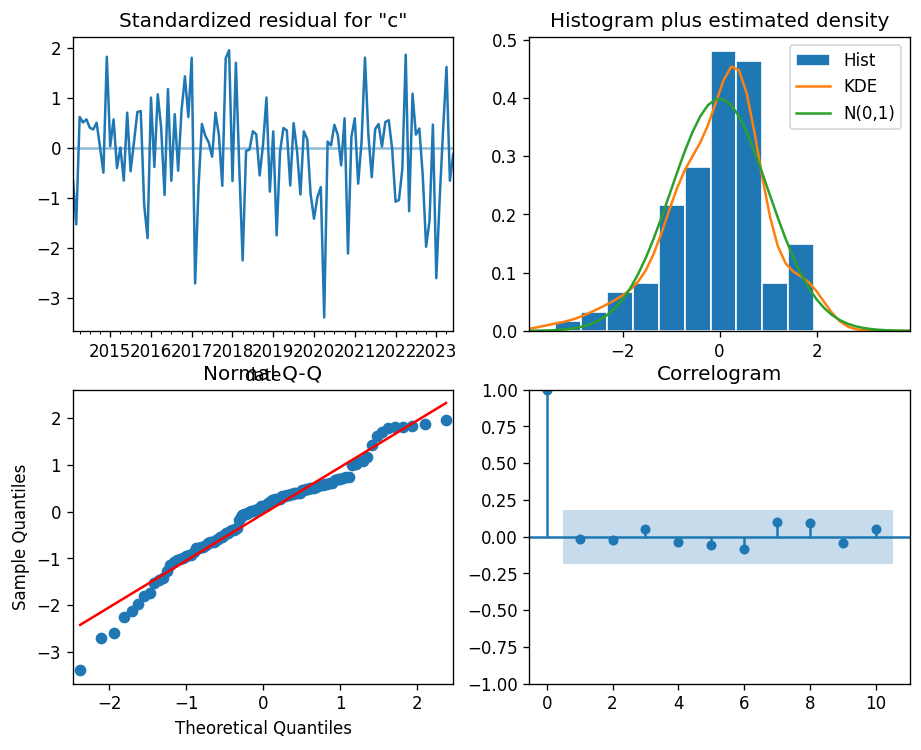

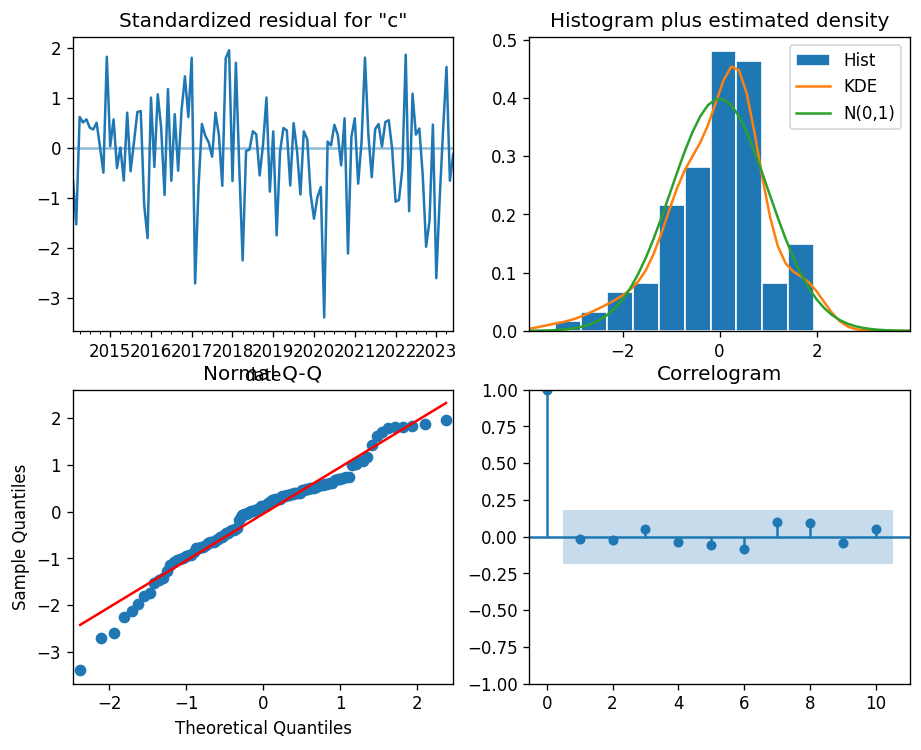

In [290]:
SARIMA_model.plot_diagnostics()

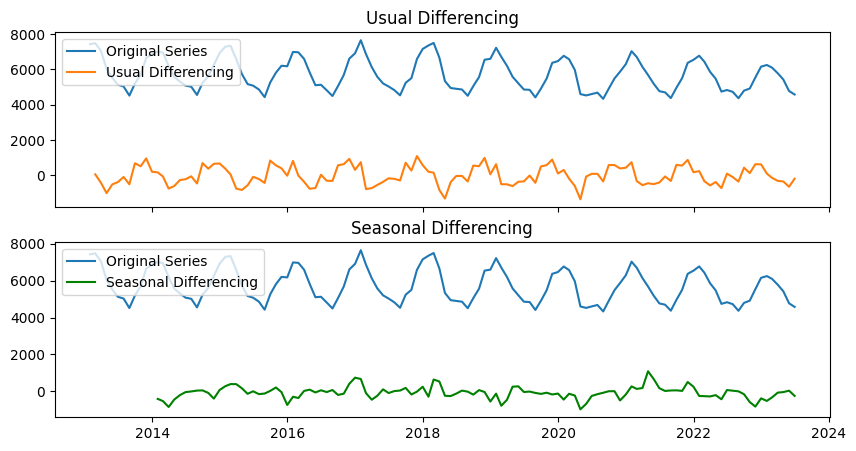

In [298]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_month[:], label='Original Series')
axes[0].plot(df_month[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df_month[:], label='Original Series')
axes[1].plot(df_month[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [299]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_month, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1570.493, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1650.088, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1577.881, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1570.765, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1654.679, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1616.362, Time=0.19 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1572.146, Time=0.47 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1572.313, Time=1.34 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1579.168, Time=0.66 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=1574.069, Time=1.54 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1570.048, Time=0.42 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1620.699, Time=0.10 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1570.975, Time=0.41 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1571.267, Time=1.18 sec
 ARIMA(1,0,0)(1,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  126
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -781.024
Date:                              Wed, 13 Sep 2023   AIC                           1570.048
Time:                                      13:43:23   BIC                           1580.993
Sample:                                  01-31-2013   HQIC                          1574.490
                                       - 06-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -22.2204      7.983     -2.783      0.005     -37.867      -6.573
ar.L1          0.4416      0.074      5.947      0.000       0.296       0.587
ma.S.L12      -0.7611      0.093     -8.187      0.000      -0.943      -0.579
sigma2      3.988e+04   5598.930      7.122      0.000    2.89e+04    5.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.69   Jarque-Bera (JB):                 8.04
Prob(Q):                              0.03   Prob(JB):                         0.02
Heteroskedasticity (H):               0.90   Skew:                            -0.55
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

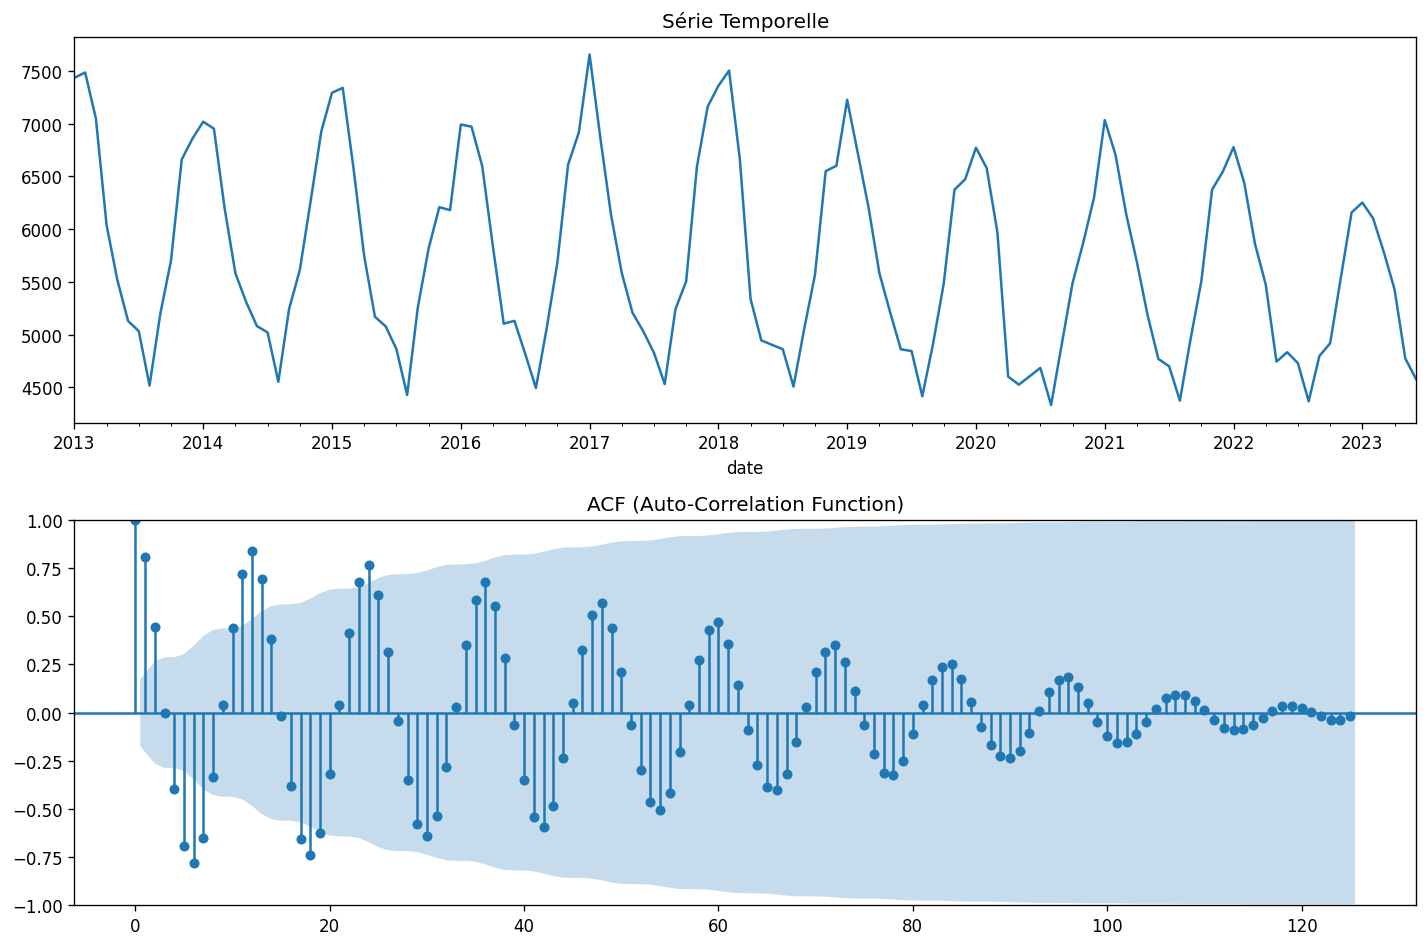

In [246]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Créer une nouvelle figure avec deux sous-graphiques (2x1)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Tracer la série temporelle dans le premier sous-graphique
df_month.plot(ax=axes[0])
axes[0].set_title('Série Temporelle')

# Tracer l'ACF dans le deuxième sous-graphique
plot_acf(df_month,lags=125, ax=axes[1])
axes[1].set_title('ACF (Auto-Correlation Function)')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher la figure
plt.show()


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/matplotlib/axes/_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


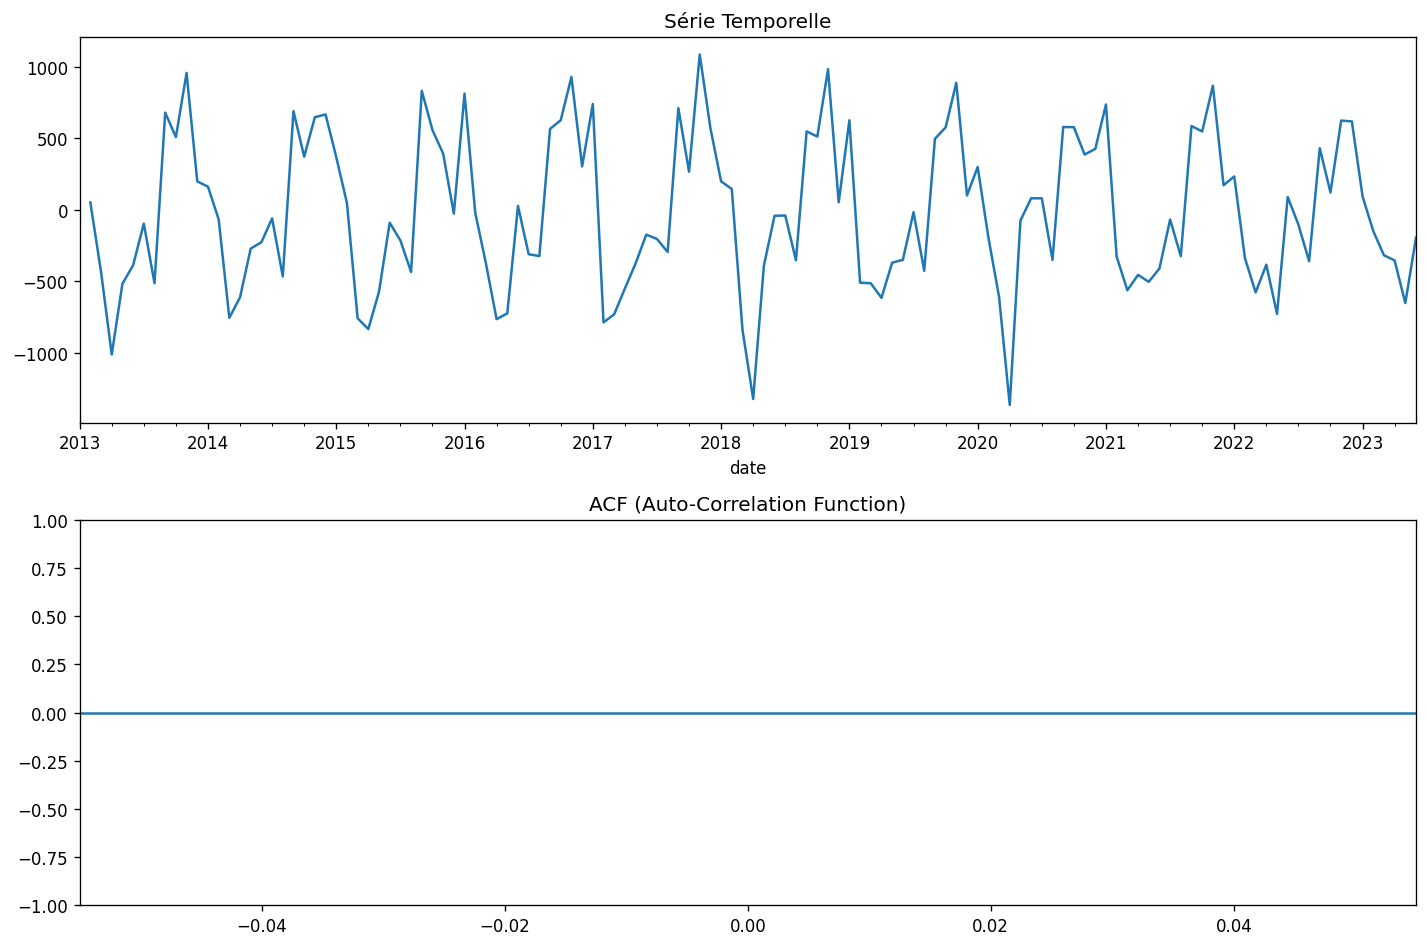

In [248]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Créer une nouvelle figure avec deux sous-graphiques (2x1)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Tracer la série temporelle dans le premier sous-graphique
df_month.diff().plot(ax=axes[0])
axes[0].set_title('Série Temporelle')

# Tracer l'ACF dans le deuxième sous-graphique
plot_acf(df_month.diff(), lags=125,ax=axes[1])
axes[1].set_title('ACF (Auto-Correlation Function)')

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher la figure
plt.show()
